Daily Challenge Day 4

In [2]:
import pandas as pd
df = pd.read_csv(r'/content/datascience_salaries.csv')
df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['salary_normalized'] = scaler.fit_transform(df[['salary']])

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Handle categorical columns using one-hot encoding
numeric_df_encoded = pd.get_dummies(df)

# Standardize the features by scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df_encoded)

# Apply PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)


In [8]:
agg_data = df.groupby('experience_level').agg({'salary': ['mean', 'median']}).reset_index()


Daily Challenge Day 5

Because the data comes in a tabular form,CSV file , where each column represents a specific attribute, and rows contain the data entries - this is a stractured data.  Unstructured data, on the other hand, lacks a predefined structure and could be in the form of text, images, audio, etc. For example, if there will be 'Job Description' field includes free-text descriptions or resumes - this will be an unstructured data.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


As we can see, there is no incomplete rows.

In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1166    False
1167    False
1168    False
1169    False
1170    False
Length: 1171, dtype: bool

No duplecated rows are detected

In [20]:
missing_data = df.columns[df.isnull().any()].tolist()
print(missing_data)

[]


                          mean   median
experience_level                       
Entry             36111.111111  30000.0
Executive         76076.923077  46000.0
Mid               51786.885246  51000.0
Senior            75088.033012  68000.0


<Figure size 1000x600 with 0 Axes>

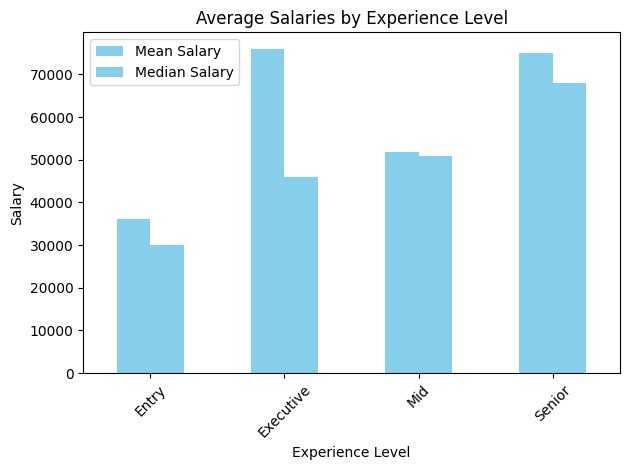

In [24]:
import matplotlib.pyplot as plt
# Group-wise analysis of experience_level
experience_salary = df.groupby('experience_level')['salary'].agg(['mean', 'median'])
print(experience_salary)

# Visualization using Matplotlib
plt.figure(figsize=(10, 6))
experience_salary.plot(kind='bar', color='skyblue')
plt.title('Average Salaries by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.legend(['Mean Salary', 'Median Salary'])
plt.tight_layout()
plt.show()